In [34]:
import pandas as pd

In [35]:
df = pd.DataFrame(pd.read_csv('dataset.csv'))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [40]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=0)

In [44]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=10, n_estimators=100)

In [45]:
random.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [46]:
y_pred = random.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8241758241758241
0.7924528301886793
0.8936170212765957
0.8400000000000001


In [48]:
feature_importance = random.feature_importances_
feature_importance

array([0.08521438, 0.04725807, 0.12166308, 0.07017755, 0.08208504,
       0.01044399, 0.01794215, 0.11306314, 0.05810176, 0.13593083,
       0.04401096, 0.11102823, 0.10308082])

In [49]:
import numpy as np
top5 = np.argsort(feature_importance)[-5:]

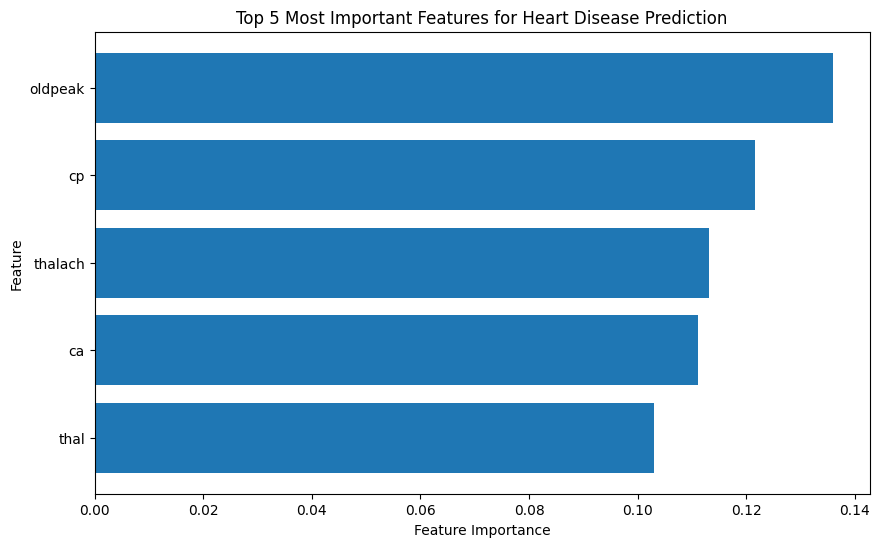

In [50]:
feature_names = df.columns.to_list()
top5_feature_names = [feature_names[i] for i in top5]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(range(len(top5)), feature_importance[top5], align='center')
plt.yticks(range(len(top5)), top5_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3, 5, 10, None],
    'n_estimators' : [100, 200, 300],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf' : [1, 2, 3, 4]
}

In [52]:
clf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, n_estimators=100;, score=0.857 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, n_estimators=100;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, n_estimators=100;, score=0.857 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, n_estimators=200;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, n_estimators=200;, score=0.814 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, n_estimators=200;, score=0.881 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [53]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'n_estimators': 200}

In [54]:
y_pred_test = clf.predict(X_test)
y_pred_test


array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0], dtype=int64)

In [55]:
print(accuracy_score(y_pred_test, y_pred))
print(precision_score(y_pred_test, y_pred))
print(recall_score(y_pred_test, y_pred))
print(f1_score(y_pred_test, y_pred))

0.9560439560439561
0.9811320754716981
0.9454545454545454
0.9629629629629629


In [56]:
# perfromance comparision
# New random forest classifier trained using gridsearchcv (tuned model) is performing better in all performance metrics.
# So tuned model is better then default model

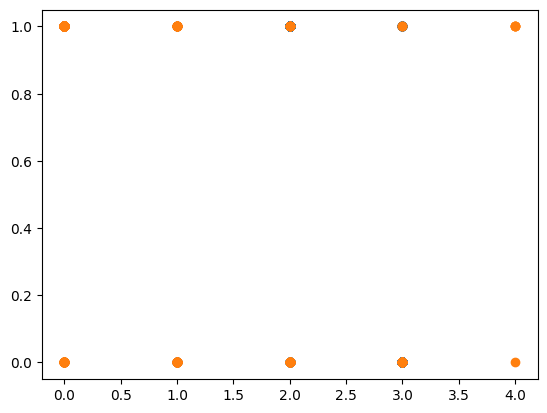

In [57]:
from matplotlib.colors import ListedColormap

feature1_index = top5[0]
feature2_index = top5[1]

plt.scatter(X.iloc[:, feature1_index], y)
plt.scatter(X.iloc[:, feature2_index], y)
